<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* Customer Analysis
* Iterators

In [1]:
import pandas as pd 
import numpy as np 
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta 
import os
import re

from functools import reduce
from collections import defaultdict

import prophet as pr

# Customer Analysis

In [2]:
os.listdir()

['.config',
 '1_orders_dataset.csv',
 'sales_vs_discount.csv',
 'online_retail.xlsx',
 'sales.csv',
 'ecommerce-data.csv',
 'groceries.csv',
 'online_retail_II.xlsx',
 'mock_sales_data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'match_result_test.csv',
 '1_order_payments_dataset.csv',
 'mall_customers.csv',
 'test.csv',
 '1_customers_dataset.csv',
 'bz_data_analyis.csv',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_data_with_stores.csv',
 'sample-sales-data.csv',
 'sample_data']

In [3]:
df = pd.read_csv('match_result_test.csv')
df.head()

,match_idx,match_type_id,match_rule_id,p1_member_idx,p2_member_idx,match_first_attack,p1_league_level,p2_league_level,p1_match_score,p2_match_score,match_time,match_result
0,10001,2,2_02,12783,11036,win,2,2,79,47,88,win
1,10002,2,2_05,19479,18315,lose,5,5,43,54,139,lost
2,10003,2,2_10,12800,16571,lose,10,10,32,4,78,win
3,10004,2,2_10,12813,10926,lose,10,10,37,58,52,lost
4,10005,2,2_11,17855,16988,win,11,11,52,41,48,win


In [5]:
cnt = df.groupby(['match_rule_id', 'match_first_attack'])['match_result'].count().reset_index()
cnt.head()

,match_rule_id,match_first_attack,match_result
0,2_01,lose,319
1,2_01,win,347
2,2_02,lose,356
3,2_02,win,338
4,2_03,lose,341


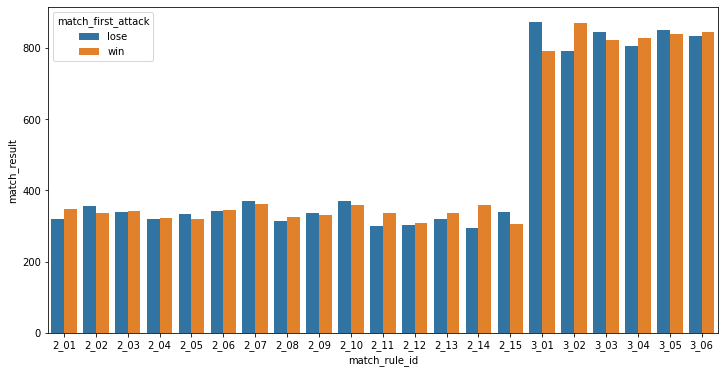

In [7]:
plt.figure(figsize = (12,6))
sns.barplot(data = cnt, x = 'match_rule_id', y = 'match_result', hue = 'match_first_attack')

In [12]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')
df.columns = ['_'.join(re.split(r'(?=[A-Z][a-z])', a[0].lower()+a[1:])).lower() for a in df.columns]
df.invoice_date = pd.to_datetime(df.invoice_date, infer_datetime_format=True)
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
df = df[(~df.invoice_no.astype(str).str.contains('C')) & (df.country != 'United Kingdom')]
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France


In [15]:
df['ds'] = df.invoice_date.to_numpy().astype('datetime64[D]')
df['y'] = df.quantity * df.unit_price
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country,ds,y
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,2010-12-01,90.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,2010-12-01,90.0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,2010-12-01,45.0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,2010-12-01,10.2
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,2010-12-01,15.6


In [37]:
cnt = df.groupby(['ds'])['y'].sum().reset_index()
cnt.head()

,ds,y
0,2010-12-01,4142.71
1,2010-12-02,177.85
2,2010-12-03,5635.02
3,2010-12-05,5921.75
4,2010-12-06,1508.34


In [38]:
m = pr.Prophet().fit(cnt)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk33479m6/87alh2p5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk33479m6/05_s68s5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11449', 'data', 'file=/tmp/tmpk33479m6/87alh2p5.json', 'init=/tmp/tmpk33479m6/05_s68s5.json', 'output', 'file=/tmp/tmpk33479m6/prophet_modelna33_mga/prophet_model-20221120234318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:43:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:43:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [39]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

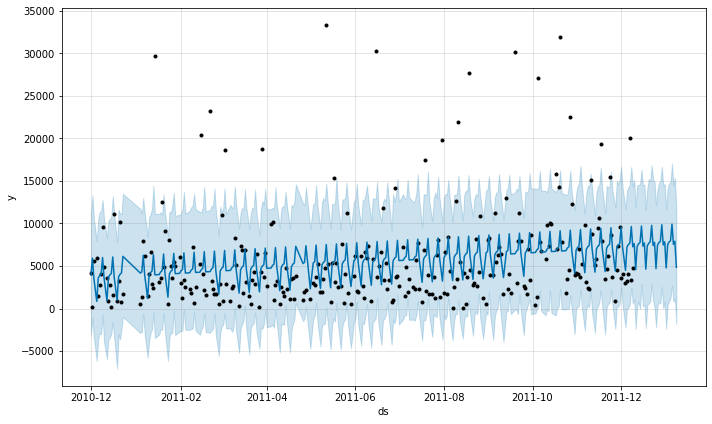

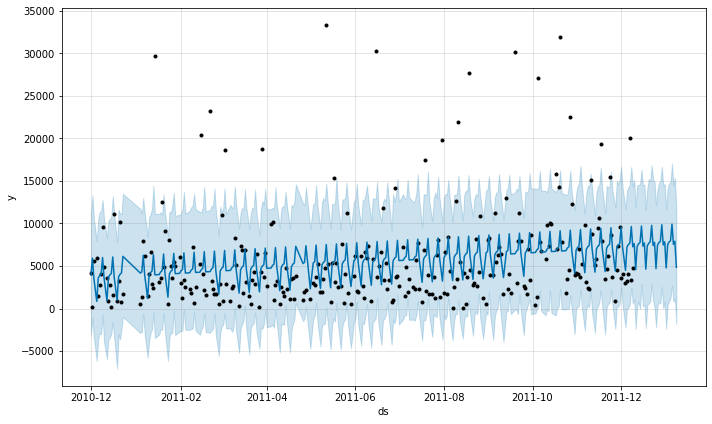

In [40]:
m.plot(forecast)

# Iterators

In [41]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [43]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [45]:
a = (a*10 for a in range(100))
a

<generator object <genexpr> at 0x7fe441d68ed0>

In [46]:
for _ in range(10) :
  print(next(a))

0
10
20
30
40
50
60
70
80
90


In [47]:
for _ in range(10) :
  print(next(a))

100
110
120
130
140
150
160
170
180
190
